## Import & Load Data

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("/kaggle/input/house-prizing/train.csv")

## EDA pre-Feature Engineering

In [11]:
#Pengaturan Tampilan Data
pd.set_option('display.max_columns', None)
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [ ]:
#Cek Data yang Kosong
pd.set_option('display.max_rows', None)
print(df.isnull().sum())


In [ ]:
#Reset Pengaturan Tampilan Data
pd.reset_option('display.max_rows')

In [ ]:
#Visualisasi Outlier (LotFrontage, MasVnrArea)
sns.boxplot(y='LotFrontage', data=df)
plt.show()
sns.boxplot(y='MasVnrArea', data=df)
plt.show()

In [ ]:
#Mencari Outlier
df[df['LotFrontage'] >= 300]

In [ ]:
#Menghapus Kolom (Alley, Fence)
df.drop(columns=['Alley', 'Fence'], inplace=True)

## Pengisian Data yang Kosong

In [30]:
#isi dengan modus
cols_fillna_modus = ['MasVnrType', 'Electrical', 'MSZoning']
for col in cols_fillna_modus:
    df[col].fillna(df[col].mode()[0], inplace=True)

#isi dengan median
median_masvnrarea = df['MasVnrArea'].median()
df['MasVnrArea'] = df['MasVnrArea'].fillna(median_masvnrarea)

#isi dengan none
cols_fill_none = [
    'PoolQC', 'GarageQual', 'GarageCond', 'GarageType',
    'GarageFinish', 'BsmtCond', 'BsmtQual', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'MiscFeature', 'FireplaceQu'
]
df[cols_fill_none] = df[cols_fill_none].fillna('None')

#isi dengan 0
cols_fill_0 = ['GarageYrBlt', 'GarageArea', 'PoolArea','MasVnrType', 'MasVnrArea']
df[cols_fill_0] = df[cols_fill_0].fillna('0')

#isi dengan median pergrup
#df['kolom_tujuan'] = df.groupby('kolom_acuan_pengelompokkan')['kolom_yang_dikelompokkan'].transform(lambda x: x.fillna(x.median()))
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


## Encoding

In [44]:
#Ordinal
qual_cond_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'None': 0 
}
qual_cond_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
    'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'
]
for col in qual_cond_cols:
    df[col] = df[col].map(qual_cond_map)

bsmt_exp_map = {
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'None': 0
}
df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exp_map)

bsmt_fin_map = {
    'GLQ': 6,
    'ALQ': 5,
    'BLQ': 4,
    'Rec': 3,
    'LwQ': 2,
    'Unf': 1,
    'None': 0
}
df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmt_fin_map)
df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmt_fin_map)

garage_fin_map = {
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'None': 0
}
df['GarageFinish'] = df['GarageFinish'].map(garage_fin_map)

lotshape_fin_map = {
    'IR3' : 0,
    'IR2' : 1,
    'IR1' : 2,
    'Reg' : 3
}
df['LotShape'] = df['LotShape'].map(lotshape_fin_map)

landslope_fin_map = {
    'Gtl' : 2,
    'Mod' : 1,
    'Sev' : 0
}
df['LandSlope'] = df['LandSlope'].map(landslope_fin_map)

utilities_map = {
    'AllPub': 3,
    'NoSewr': 2,
    'NoSeWa': 1,
    'ELO': 0
}
df['Utilities'] = df['Utilities'].map(utilities_map)

paveddrive_map = {
    'Y': 2,
    'P': 1,
    'N': 0
}
df['PavedDrive'] = df['PavedDrive'].map(paveddrive_map)

functional_map = {
    'Typ': 7,
    'Min1': 6,
    'Min2': 5,
    'Mod': 4,
    'Maj1': 3,
    'Maj2': 2,
    'Sev': 1, 
    'Sal': 0
}
df['Functional'] = df['Functional'].map(functional_map)

fence_map = {
    'GdPrv': 4,
    'MnPrv': 3,
    'GdWo': 2,
    'MnWw': 1,
    0: 0
}
df['Fence'] = df['Fence'].fillna(0)
df['Fence'] = df['Fence'].map(fence_map)



In [32]:
#Categorical
nominal_cols = [
    'MSZoning', 'Alley', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
    'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'
]
df = pd.get_dummies(df, columns=nominal_cols)

In [45]:
#control panel
df['Fence'].isnull().sum()

0

<Axes: >

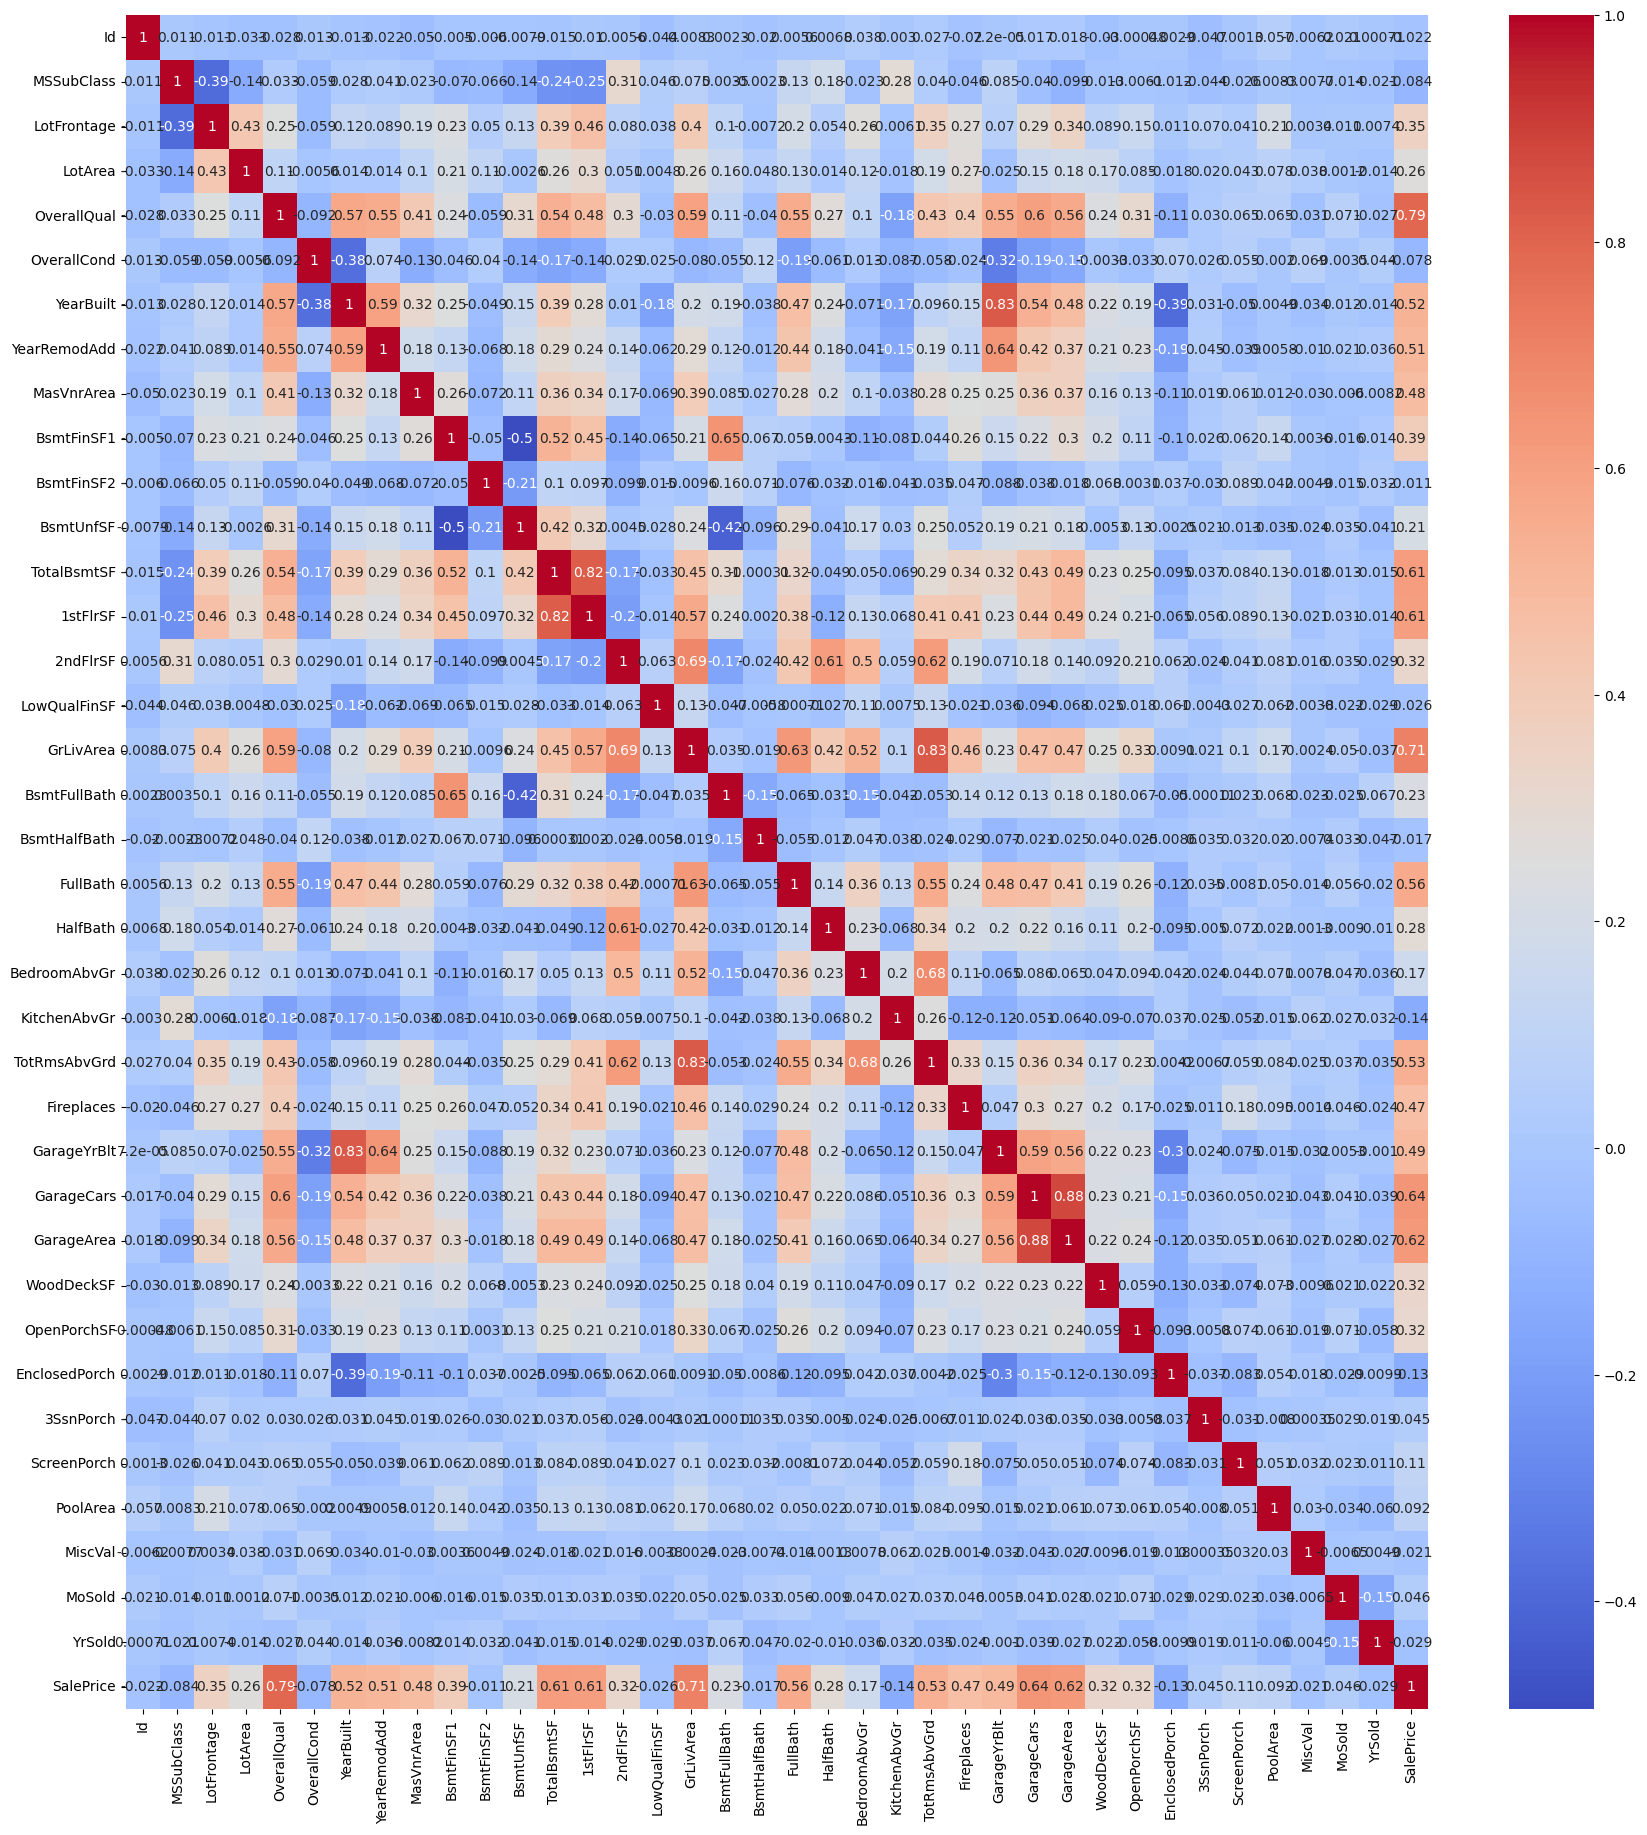

In [6]:
# HeatMap
df_num = df.select_dtypes(include=['int64', 'float64'])
corr = df_num.corr()
plt.figure(figsize=(21, 22))
sns.heatmap(corr, annot=True, cmap='coolwarm')

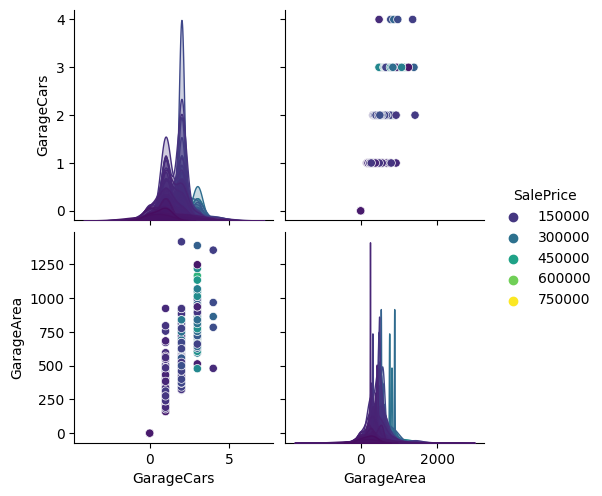

In [7]:
#Visualisasi Hubungan GarageCars, GarageArea, dan SalePrice dalam Scatterplot Matrix.
sns.pairplot(df[['GarageCars', 'GarageArea', 'SalePrice']], hue='SalePrice',palette="viridis")
plt.show()